# Executive summary 

> In the following analysis, I tried to create recommendations for selecting up to 3 models of computers from the presented vendor offer, based on the surveys collected by the company among its employees. Surveys contain relative importance weights of the following variables describing a computer's performance:
* Memory
* Processing
* Storage
* Price inverse - this metric was given to me by the company as you can see in the dataset, with the directive that price inverse being fixed at a 25% weight in the purchase decision.



# Problem Statement
1. **Purpose**

    Selecting  up to 3 models of computers for company.

2.   **Problems**  

    Unsatisfactory data, lack of a detailed description of the survey methodology and insufficient description of features, lack of minimum and upper requirements for each utilization group, relativity of weights in various groups of utilization. 
3.   **Evaluation** 

    The evaluation of the computers is based on the sum of the valid products of the scores, the appropriate processing of the data and the extraction of significant computers from them.
4. **Recommendation** 

    I managed to find the best computers based on my assumptions but I would also like to recommend solving and rethinking above problems.   


# EDA - exploratory data analysis
**EDA part 1**

**Importing packages and reading data**


In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler 

In [244]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [245]:
df_utilization = pd.read_csv("https://raw.githubusercontent.com/shubhamkalra27/dsep-2020/main/datasets/util_b_emp.csv",
                             index_col ="employee_id")
df_performance_expectations = pd.read_csv("https://raw.githubusercontent.com/shubhamkalra27/dsep-2020/main/datasets/survey_emp.csv",
                                          index_col ="employee_id")
df_vendor_offer = pd.read_csv("https://raw.githubusercontent.com/shubhamkalra27/dsep-2020/main/datasets/vendor_options.csv",
                                index_col ="computer_id")

**Data preprocessing and sanity testing**


---



In [246]:
df_employee_expectations = df_performance_expectations.join(df_utilization)
df_employee_expectations

,memory,processing,storage,inverse_price,utilization_bin
employee_id,,,,,
1743,0.375,0.225,0.150,0.25,high
1752,0.450,0.225,0.075,0.25,high
1758,0.375,0.300,0.075,0.25,high
1825,0.300,0.300,0.150,0.25,high
1842,0.300,0.300,0.150,0.25,high
...,...,...,...,...,...
1463,0.225,0.150,0.375,0.25,low
1625,0.225,0.150,0.375,0.25,low
1377,0.150,0.225,0.375,0.25,low


*Below I checked the correctness of values comming from the surveys. The sum of weights is correct.*


In [247]:
df_employee_expectations.sum(axis=1).unique()

array([1.])

In [248]:
number_of_survey = df_employee_expectations["utilization_bin"].value_counts()
print("Number of survey per each utilization group : ")
number_of_survey

Number of survey per each utilization group : 


medium    86
high      40
low       20
Name: utilization_bin, dtype: int64

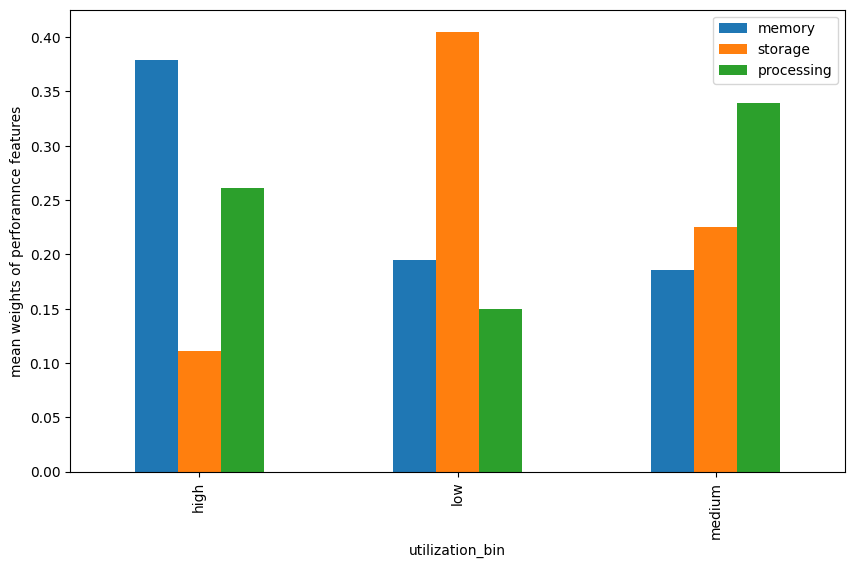

In [249]:
grouped_data = df_employee_expectations[["memory","storage","processing","utilization_bin"]].groupby("utilization_bin").mean()
grouped_data.plot(kind="bar", 
                  figsize=(10, 6),
                  ylabel="mean weights of perforamnce features")
plt.legend()
plt.show()

utilization_bin,high,low,medium
memory,"[0.375, 0.45, 0.3]","[0.15, 0.225]","[0.225, 0.15]"
processing,"[0.225, 0.3]","[0.15, 0.075, 0.225]","[0.3, 0.375]"
storage,"[0.15, 0.075, 0.0, 0.225]","[0.45, 0.375]",[0.225]


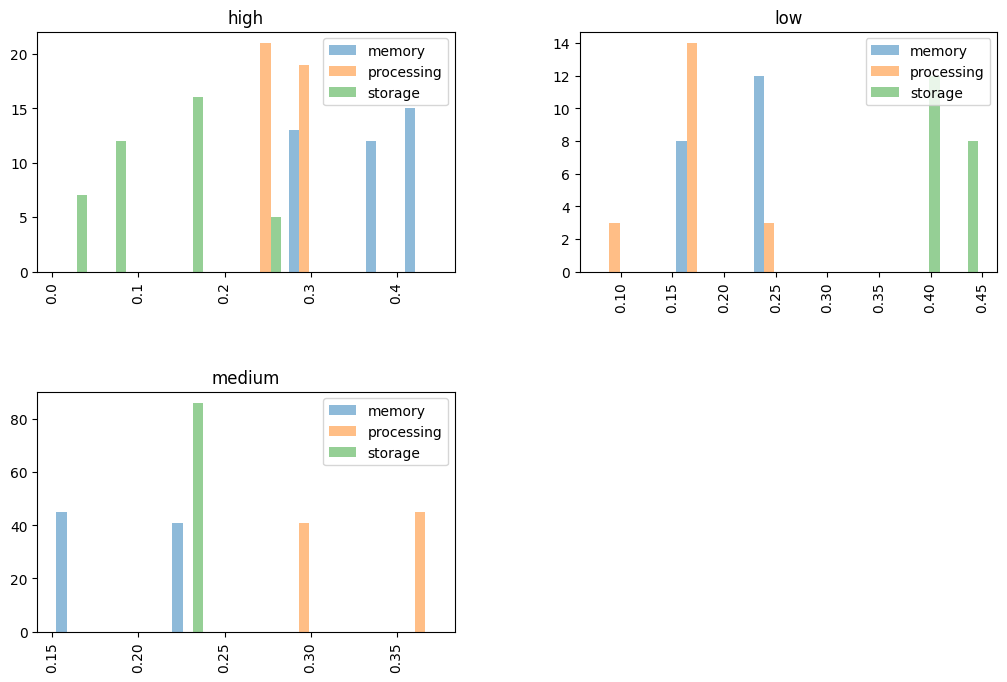

In [250]:
df_employee_expectations[["memory","processing",'storage','utilization_bin']].hist(by="utilization_bin",alpha=0.5,legend=True,figsize=(12,8))
display(pd.DataFrame(df_employee_expectations.groupby("utilization_bin")["memory"].unique()).T.append(
      pd.DataFrame(df_employee_expectations.groupby("utilization_bin")["processing"].unique()).T).append(
pd.DataFrame(df_employee_expectations.groupby("utilization_bin")["storage"].unique()).T))



---



For venodr_offer dataframe I have added two new features price in percents and  peroframance_score which is the  sum of computer parameters, it is simplified metric which helps to evaluate computer as a whole.

In [251]:
df_vendor_offer["price"] = round(1/df_vendor_offer["inverse_price"],4)*100
df_vendor_offer["performance_score"] = df_vendor_offer.memory + df_vendor_offer.processing + df_vendor_offer.storage
df_vendor_offer.sort_values(by = "performance_score",ascending = False,inplace=True)
df_vendor_offer

,memory,processing,storage,inverse_price,price,performance_score
computer_id,,,,,,
4,8,9,10,1.0,100.00,27
12,8,9,10,1.0,100.00,27
16,9,8,9,1.3,76.92,26
1,8,8,9,1.7,58.82,25
20,7,10,7,2.0,50.00,24
8,9,6,9,2.0,50.00,24
9,9,8,7,2.0,50.00,24
7,7,7,9,2.3,43.48,23
13,5,7,10,2.7,37.04,22


In vendor offer dataset exists two computers with the same properties its computers with id 4 and 12, so I have decided to drop computer 4 from data frame.Now we have only 3 computers with the same perforamnce_score. 

In [252]:
df_vendor_offer_dropped =  df_vendor_offer.drop(4)
df_vendor_offer_dropped

,memory,processing,storage,inverse_price,price,performance_score
computer_id,,,,,,
12,8,9,10,1.0,100.00,27
16,9,8,9,1.3,76.92,26
1,8,8,9,1.7,58.82,25
20,7,10,7,2.0,50.00,24
8,9,6,9,2.0,50.00,24
9,9,8,7,2.0,50.00,24
7,7,7,9,2.3,43.48,23
13,5,7,10,2.7,37.04,22
2,6,7,7,3.3,30.30,20


In the offer from our vendor we have one outlier. Correaltion between the 
inverse_price and performance_score is almost -1. So inverse_price could be crated as a inverse sum of computer perforamance featues.

correlation for inverse price: -0.9998108016300209

correlation for price: 0.8348603700783211



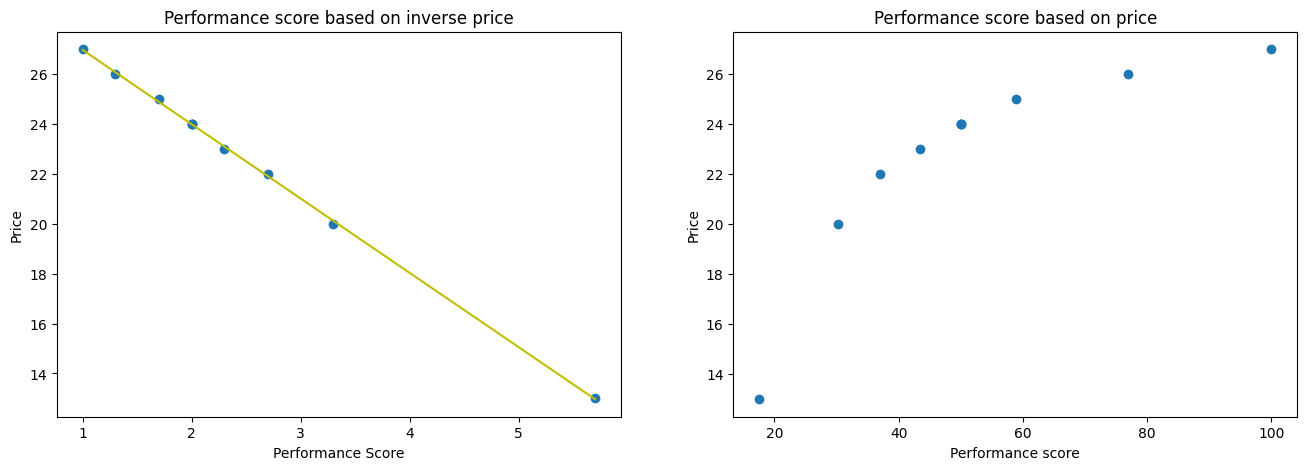

In [253]:
y = df_vendor_offer_dropped["performance_score"]
x = df_vendor_offer_dropped.inverse_price
corr = df_vendor_offer_dropped.inverse_price.corr(y)
print(f"correlation for inverse price: {corr}\n")

fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].set_title("Performance score based on inverse price") 
ax[0].set_xlabel("Performance Score") 
ax[0].set_ylabel("Price") 
ax[0].scatter(x,y)
m, b = np.polyfit(x, y, 1)
ax[0].plot(x, m*x+b,c="y")

ax[1].set_title("Performance score based on price") 
ax[1].scatter(df_vendor_offer_dropped["price"],y)
ax[1].set_xlabel("Performance score") 
ax[1].set_ylabel("Price") 

corr = df_vendor_offer_dropped["price"].corr(y)
print(f"correlation for price: {corr}\n")


Counting price per each performance score.

In [254]:
df_vendor_offer_dropped["price_per_p_point"] = df_vendor_offer_dropped["price"]/df_vendor_offer_dropped["performance_score"]
df_vendor_offer_dropped

,memory,processing,storage,inverse_price,price,performance_score,price_per_p_point
computer_id,,,,,,,
12,8,9,10,1.0,100.00,27,3.703704
16,9,8,9,1.3,76.92,26,2.958462
1,8,8,9,1.7,58.82,25,2.352800
20,7,10,7,2.0,50.00,24,2.083333
8,9,6,9,2.0,50.00,24,2.083333
9,9,8,7,2.0,50.00,24,2.083333
7,7,7,9,2.3,43.48,23,1.890435
13,5,7,10,2.7,37.04,22,1.683636
2,6,7,7,3.3,30.30,20,1.515000


# Selection Approach 
**EDA part 2**

I have created reward function for computers based on surveys.It adds up the values of the weight of each feature and multiplies through the computer assessment and then adds up the values of each feature.

In [255]:
def s_score(df_rate,df_weights,groups="utilization_bin",group_length=False):
    """
    Calculates the s-score for each row in the `df_rate` dataframe, using the sum of weights of o provided in `df_weights`.

    Parameters:
    -----------
    df_rate : pandas.DataFrame
        A dataframe containing the values to be scored. The dataframe should have the same columns as `df_weights`.
    df_weights : pandas.DataFrame
        A dataframe containing the weights to be used for scoring. The dataframe should have the same columns as `df_rate`.
    groups (str or pandas.Series, optional): The column name or series to group by.
   
    Returns:
    --------
    pandas.DataFrame
        A dataframe containing the s-score for each row in `df_rate`. If `groups` is not False, the dataframe will contain additional columns with the s-score for each group.
    """
    length = []
    df_concat = pd.DataFrame(index=df_rate.index)
    features = ["memory","processing","storage","inverse_price"]
    for df_group in df_employee_expectations.groupby(groups) :
      computer_score=[]
      if group_length:
        length.append(len(df_group[-1].index))
      # print(df_group[-1])
      for index,computer in df_rate.iterrows() :
        dot_products = df_group[1][features].apply(lambda weight: np.dot(computer, weight), axis=1)
        computer_score.append(sum(dot_products))
      df_return = pd.DataFrame({f"{df_group[0]}_utilization_s-score": computer_score})
      # df_return["surveys_score"] = df_return["surveys_score"]*1000/df_return["surveys_score"].sum()
      
      df_return.index = df_rate.index
      df_concat = pd.concat([df_concat,df_return],axis=1)
    df_concat.index = df_rate.index
    if group_length:
      return df_concat,length
    
    return df_concat
    

**Simplified Approach**

---





In [256]:
features = ["memory","processing","storage","inverse_price"]
df_vendor_offer_dropped  = pd.concat([df_vendor_offer_dropped,s_score(df_vendor_offer_dropped[features],df_employee_expectations[features],df_employee_expectations["utilization_bin"])],axis=1)
df_vendor_offer_dropped

,memory,processing,storage,inverse_price,price,performance_score,price_per_p_point,high_utilization_s-score,low_utilization_s-score,medium_utilization_s-score
computer_id,,,,,,,,,,
12,8,9,10,1.0,100.00,27,3.703704,269.275,144.2,605.375
16,9,8,9,1.3,76.92,26,2.958462,272.575,138.5,579.275
1,8,8,9,1.7,58.82,25,2.352800,261.425,136.6,571.900
20,7,10,7,2.0,50.00,24,2.083333,261.275,124.0,582.025
8,9,6,9,2.0,50.00,24,2.083333,258.725,136.0,535.975
9,9,8,7,2.0,50.00,24,2.083333,270.725,125.8,555.625
7,7,7,9,2.3,43.48,23,1.890435,241.850,132.7,539.650
13,5,7,10,2.7,37.04,22,1.683636,219.975,135.0,535.650
2,6,7,7,3.3,30.30,20,1.515000,227.850,117.6,506.475


**Band Normalization Approach**

---



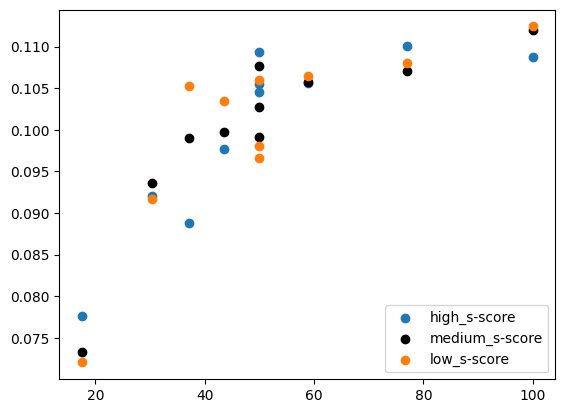

In [257]:
plt.scatter(df_vendor_offer_dropped.price,df_vendor_offer_dropped["high_utilization_s-score"]/df_vendor_offer_dropped["high_utilization_s-score"].sum(),label="high_s-score")
plt.scatter(df_vendor_offer_dropped.price,df_vendor_offer_dropped["medium_utilization_s-score"]/df_vendor_offer_dropped["medium_utilization_s-score"].sum(),c="black",label="medium_s-score")
plt.scatter(df_vendor_offer_dropped.price,df_vendor_offer_dropped["low_utilization_s-score"]/df_vendor_offer_dropped["low_utilization_s-score"].sum(),label="low_s-score")
plt.legend(loc="lower right")
plt.show()

I decided to remove outlier computer because its s_score result was not sufficient for any of the groups.Although its price compensated for the value of the function to some extent, unfortunately insufficiently. Furthermore, in normalisation it would distort the result by over-stretching the range.

In [258]:
scaler = MinMaxScaler()
df_vendor_without_outlier = df_vendor_offer_dropped[['memory','processing','storage'	,'inverse_price']].drop(3)
df_vendor_offer_normalized =scaler.fit_transform(df_vendor_without_outlier)
df_vendor_offer_normalized = pd.DataFrame(df_vendor_offer_normalized,columns=["memory","processing","storage","inverse_price"],index=df_vendor_without_outlier.index)
df_vendor_offer_normalized

,memory,processing,storage,inverse_price
computer_id,,,,
12,0.75,0.75,1.000000,0.000000
16,1.00,0.50,0.666667,0.130435
1,0.75,0.50,0.666667,0.304348
20,0.50,1.00,0.000000,0.434783
8,1.00,0.00,0.666667,0.434783
9,1.00,0.50,0.000000,0.434783
7,0.50,0.25,0.666667,0.565217
13,0.00,0.25,1.000000,0.739130
2,0.25,0.25,0.000000,1.000000


In [259]:
df_temp = s_score(df_vendor_offer_normalized[features],df_employee_expectations[features])
df_vendor_offer_normalized = pd.concat([df_vendor_offer_normalized,df_temp],axis=1)

In [260]:
df_vendor_offer_normalized

,memory,processing,storage,inverse_price,high_utilization_s-score,low_utilization_s-score,medium_utilization_s-score
computer_id,,,,,,,
12,0.75,0.75,1.000000,0.000000,23.606250,13.275000,53.212500
16,1.00,0.50,0.666667,0.130435,24.616848,11.452174,46.266848
1,0.75,0.50,0.666667,0.304348,22.568478,11.346739,46.012228
20,0.50,1.00,0.000000,0.434783,22.347826,7.123913,46.510326
8,1.00,0.00,0.666667,0.434783,22.447826,11.473913,38.222826
9,1.00,0.50,0.000000,0.434783,24.710326,7.573913,39.910326
7,0.50,0.25,0.666667,0.565217,18.783424,10.926087,40.333424
13,0.00,0.25,1.000000,0.739130,14.422554,12.545652,42.535054
2,0.25,0.25,0.000000,1.000000,16.393750,6.725000,32.787500


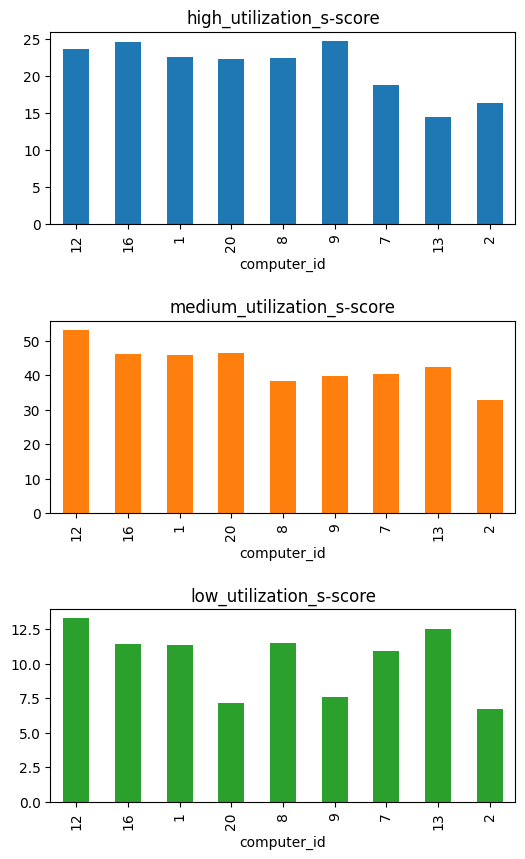

In [261]:
fig, ax = plt.subplots(nrows=3, figsize=(6, 10))
df_vendor_offer_normalized[["high_utilization_s-score","medium_utilization_s-score","low_utilization_s-score"]].plot.bar(ax=ax, subplots=True,legend=False)
plt.subplots_adjust(hspace=0.5)

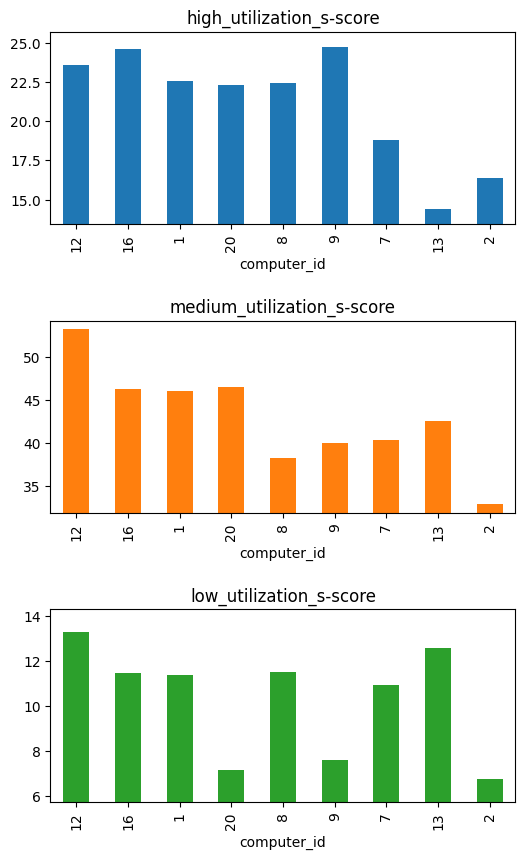

In [262]:
fig, ax = plt.subplots(nrows=3, figsize=(6, 10))
df_vendor_offer_normalized[["high_utilization_s-score","medium_utilization_s-score","low_utilization_s-score"]].plot.bar(ax=ax, subplots=True,legend=False)

plt.subplots_adjust(hspace=0.5)
for axes in ax:
    ylim = axes.get_ylim()
    axes.set_ylim(ylim[0], df_vendor_offer_normalized[axes.title.get_text()].max()+1)
    axes.set_ylim(bottom= df_vendor_offer_normalized[axes.title.get_text()].min()-1)

In [263]:
# computer number 16 is only 0.4% lower in normlized s_score than 9
100*(df_vendor_offer_normalized['high_utilization_s-score'] -df_vendor_offer_normalized['high_utilization_s-score'].max())/df_vendor_offer_normalized['high_utilization_s-score'].max()

computer_id
12    -4.468076
16    -0.378296
1     -8.667825
20    -9.560780
8     -9.156091
9      0.000000
7    -23.985528
13   -41.633492
2    -33.656278
Name: high_utilization_s-score, dtype: float64

In [273]:
# second computer is about 12% lower in normlized s_score than first one
100*(df_vendor_offer_normalized['medium_utilization_s-score'] -df_vendor_offer_normalized['medium_utilization_s-score'].max())/df_vendor_offer_normalized['medium_utilization_s-score'].max()

computer_id
12     0.000000
16   -13.052670
1    -13.531166
20   -12.595112
8    -28.169460
9    -24.998213
7    -24.203103
13   -20.065672
2    -38.383838
Name: medium_utilization_s-score, dtype: float64

In [265]:
# second computer is only 5%  lower than first one
100*(df_vendor_offer_normalized['low_utilization_s-score'] -df_vendor_offer_normalized['low_utilization_s-score'].max())/df_vendor_offer_normalized['low_utilization_s-score'].max()

computer_id
12     0.000000
16   -13.731270
1    -14.525506
20   -46.335872
8    -13.567510
9    -42.946041
7    -17.694260
13    -5.494146
2    -49.340866
Name: low_utilization_s-score, dtype: float64

**No Band Approach**

In this approach, I create subgroups of surveys based on unique values of  votes, but I know from EDA part 1 that in each utilization group, the weight values do not overlap, so I actually create subgroups for utilization groups.

---



In [274]:
df_many,df_many_lengths = s_score(df_vendor_offer_normalized[features],df_employee_expectations[features], features+["utilization_bin"],group_length=True)

l,m,h=1,1,1
for col in df_many.columns:
    if "low" in col:
      df_many.rename(columns={f"{col}": f"low_{l}"},inplace=True)
      l = l+1
    elif "high" in col :
      df_many.rename(columns={f"{col}": f"high_{h}"},inplace=True)
      h+=1
    elif "medium" in col:
      df_many.rename(columns={f"{col}": f"medium_{m}"},inplace=True)
      m+=1
df_many_length = pd.DataFrame(zip(df_many.columns,df_many_lengths),columns=["","number_of_employees"])
df_many_length = df_many_length.T
df_many_length.columns = df_many_length.iloc[0]
df_many_length = df_many_length.iloc[1:].sort_index(axis=1)

In [275]:
df_many_length

,high_1,high_2,high_3,high_4,high_5,high_6,low_1,low_2,low_3,low_4,medium_1,medium_2
number_of_employees,5,8,8,4,8,7,5,3,3,9,45,41


In [267]:
df_many.sort_index(axis=1,inplace=True)
df_many

,high_1,high_2,high_3,high_4,high_5,high_6,low_1,low_2,low_3,low_4,medium_1,medium_2
computer_id,,,,,,,,,,,,
12,3.093750,4.800000,4.800000,2.325000,4.650000,3.937500,3.375000,1.968750,2.025000,5.906250,27.843750,25.368750
16,2.975543,4.660870,4.960870,2.430435,5.160870,4.428261,2.788043,1.635326,1.785326,5.243478,23.404891,22.861957
1,2.817935,4.408696,4.558696,2.229348,4.608696,3.945109,2.817935,1.653261,1.747011,5.128533,23.673913,22.338315
20,2.418478,4.469565,4.169565,2.384783,4.469565,4.435870,1.668478,1.226087,0.888587,3.340761,25.141304,21.369022
8,2.793478,4.069565,4.669565,2.134783,4.869565,3.910870,2.793478,1.526087,1.901087,5.253261,18.391304,19.831522
9,2.605978,4.469565,4.769565,2.534783,5.369565,4.960870,1.668478,1.113587,1.113587,3.678261,20.078804,19.831522
7,2.487772,3.730435,3.880435,1.815217,3.780435,3.089130,2.769022,1.567663,1.717663,4.871739,20.702446,19.630978
13,2.330163,3.278261,3.128261,1.339130,2.528261,1.818478,3.361413,1.848098,1.960598,5.375543,22.658967,19.876087
2,1.906250,3.200000,3.200000,1.675000,3.350000,3.062500,1.625000,1.031250,0.975000,3.093750,17.156250,15.631250


In [268]:
df_many_normalized = df_many/df_many.sum()
df_many_normalized

,high_1,high_2,high_3,high_4,high_5,high_6,low_1,low_2,low_3,low_4,medium_1,medium_2
computer_id,,,,,,,,,,,,
12,0.132046,0.129426,0.125862,0.123221,0.119886,0.117227,0.147594,0.145080,0.143476,0.140989,0.139882,0.135851
16,0.127001,0.125674,0.130080,0.128809,0.133057,0.131838,0.121925,0.120509,0.126495,0.125168,0.117582,0.122427
1,0.120274,0.118875,0.119535,0.118152,0.118821,0.117454,0.123232,0.121831,0.123780,0.122424,0.118934,0.119623
20,0.103224,0.120516,0.109331,0.126390,0.115234,0.132065,0.072965,0.090352,0.062958,0.079748,0.126305,0.114432
8,0.119230,0.109730,0.122442,0.113140,0.125546,0.116434,0.122163,0.112459,0.134696,0.125401,0.092395,0.106199
9,0.111227,0.120516,0.125064,0.134340,0.138437,0.147695,0.072965,0.082062,0.078900,0.087804,0.100872,0.106199
7,0.106182,0.100586,0.101750,0.096204,0.097467,0.091970,0.121093,0.115523,0.121700,0.116294,0.104005,0.105125
13,0.099455,0.088394,0.082027,0.070972,0.065183,0.054140,0.146999,0.136189,0.138913,0.128320,0.113835,0.106438
2,0.081362,0.086284,0.083908,0.088772,0.086369,0.091177,0.071064,0.075994,0.069081,0.073851,0.086190,0.083706


In [269]:
# df_many_normalized.idxmax()
two_bests=[]
for col in df_many_normalized.columns: 
  temp= ["".join(col)]
  temp += df_many_normalized[col].nlargest(2).index.tolist()
  # temp[:0] = str(col)
  two_bests.append(temp)
two_bests
df_two_bests = pd.DataFrame(two_bests, columns=['subgroup', 'first_computerID', 'second_computerID'])
df_two_bests["number_of_votes"] = list(df_many_length.iloc[0])
df_two_bests

,subgroup,first_computerID,second_computerID,number_of_votes
0,high_1,12,16,5
1,high_2,12,16,8
2,high_3,16,12,8
3,high_4,9,16,4
4,high_5,9,16,8
5,high_6,9,20,7
6,low_1,12,13,5
7,low_2,12,13,3
8,low_3,12,13,3
9,low_4,12,13,9


**Common Sense Approach**

In this approach, I'm trying to summarize the last two approaches.

---



In band normalized approach  for the high group, I got two potential computers similar to each other, computers No. 16 and 9. For the medium group, I got computer No. 12, and for the low group, I got computers No. 12 and 13.

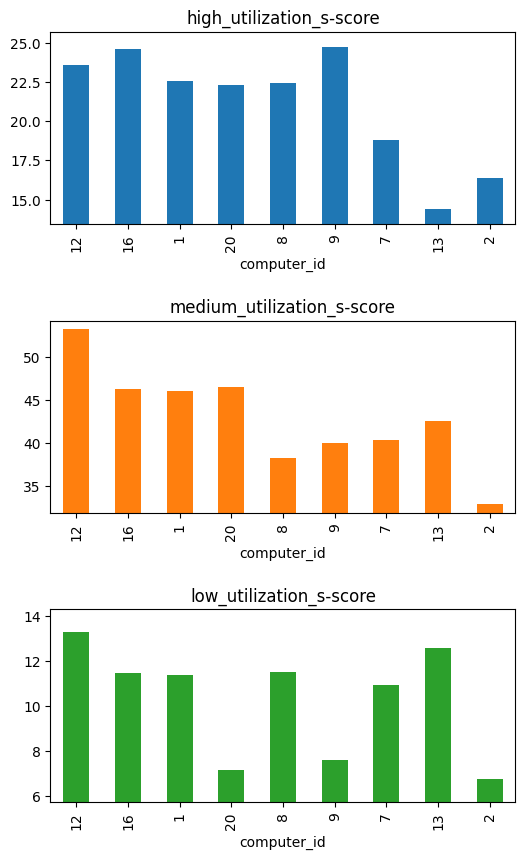

In [270]:
fig, ax = plt.subplots(nrows=3, figsize=(6, 10))
df_vendor_offer_normalized[["high_utilization_s-score","medium_utilization_s-score","low_utilization_s-score"]].plot.bar(ax=ax, subplots=True,legend=False)

plt.subplots_adjust(hspace=0.5)
for axes in ax:
    ylim = axes.get_ylim()
    axes.set_ylim(ylim[0], df_vendor_offer_normalized[axes.title.get_text()].max()+1)
    axes.set_ylim(bottom= df_vendor_offer_normalized[axes.title.get_text()].min()-1)

In [271]:
for i in range(1,5):
  print(df_many_normalized[f"low_{i}"].nlargest(2))

computer_id
12    0.147594
13    0.146999
Name: low_1, dtype: float64
computer_id
12    0.145080
13    0.136189
Name: low_2, dtype: float64
computer_id
12    0.143476
13    0.138913
Name: low_3, dtype: float64
computer_id
12    0.140989
13    0.128320
Name: low_4, dtype: float64


In [295]:
for i in df_many_normalized.columns:
  n_largest = df_many_normalized[i].nlargest(2)
  print(f"First computer in {n_largest.name} group has greater s_score than the second one by\n",
        (n_largest.iloc[0]-n_largest.iloc[1])*100/n_largest.iloc[1],"%\n")

First computer in high_1 group has greater s_score than the second one by
 3.972602739726003 %

First computer in high_2 group has greater s_score than the second one by
 2.985074626865687 %

First computer in high_3 group has greater s_score than the second one by
 3.3514492753623397 %

First computer in high_4 group has greater s_score than the second one by
 4.29338103756705 %

First computer in high_5 group has greater s_score than the second one by
 4.043807919123869 %

First computer in high_6 group has greater s_score than the second one by
 11.835334476843894 %

First computer in low_1 group has greater s_score than the second one by
 0.4042037186742156 %

First computer in low_2 group has greater s_score than the second one by
 6.528451698279644 %

First computer in low_3 group has greater s_score than the second one by
 3.284823284823294 %

First computer in low_4 group has greater s_score than the second one by
 9.87261146496816 %

First computer in medium_1 group has greate

# Conclusion

*  My recommendation is the results from the No Band Approach,
that is, computers number 12 for all subgroups medium , low and subgroup high_1 high_2. And computers number 16 for the high_3 subgroup and computers number 9 for the other high groups.

*  However, I would like to suggest a re-poll for the low group for computer no. 13 which was almost 3 times cheaper than no. 12. This time with a question about their minimum requirements. Another way to address this issue is to rethink the inverse_price values for each utilization group.